<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Requirements Used: -

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Churn Analysis Pipeline: -
### 1- Data Acquisition: -
#### 📌 Data Source: Kaggle/Telecom Dataset
#### 📌 Data Collection Using Pandas
### 2- Data Preprocessing: -
#### 📌 Checking for Missing Values & Droping them.
#### 📌 Checking for Duplicates.
#### 📌 Removing Unecessary Columns.
#### 📌 Encoding Categorical Columns
#### 📌 Scaling Numerical Columns
### 3- EDA: -
#### 📌 Performed Univariate on each column.
#### 📌 Understand the distribution of each one.
#### 📌 Bivariate Analysis to define the relation between churn and other columns.
#### 📌 Multivariate Analysis Using Heatmap to visualize the correlation between features.

### 🔍 Dataset is mostly balanced & distributed.
### 🔍 can be used in performing multiple projects.

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

# Data Collection

In [32]:
df = pd.read_csv('C:/Users/Ahmed Hasaballa/OneDrive/Desktop/work/archive (2)/customer_churn_dataset-training-master.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [34]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [35]:
df.shape

(440833, 12)

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Checking for Null Values & Duplicates

In [36]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Droping Null Values

In [37]:
df.dropna(inplace=True)

In [38]:
df.duplicated().sum()

np.int64(0)

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Dataset Summary

In [39]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Droping Unnecessary Columns

In [40]:
df.drop(columns='CustomerID', inplace=True)

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

# Detecting Oultiers

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


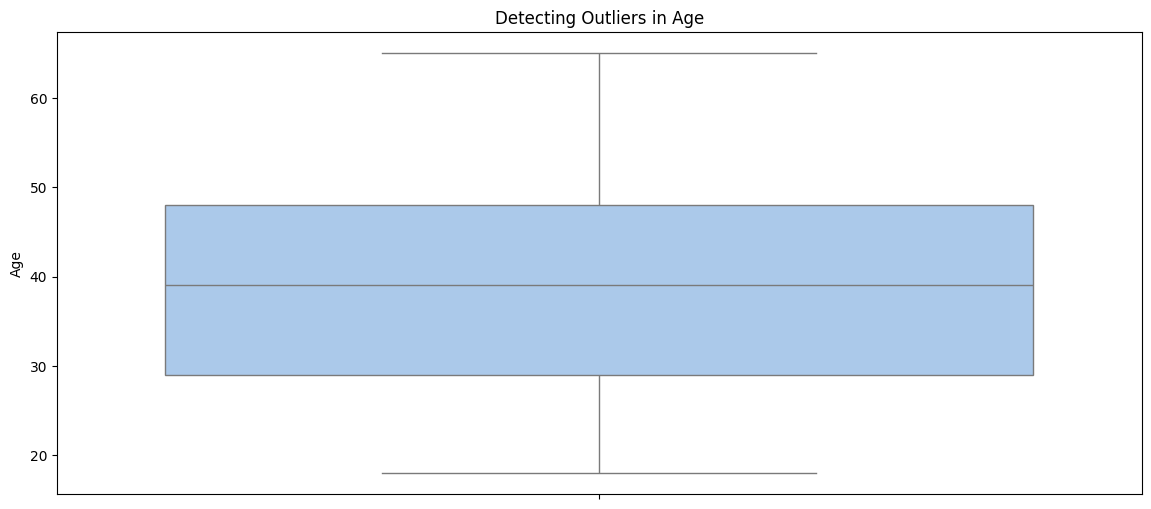

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


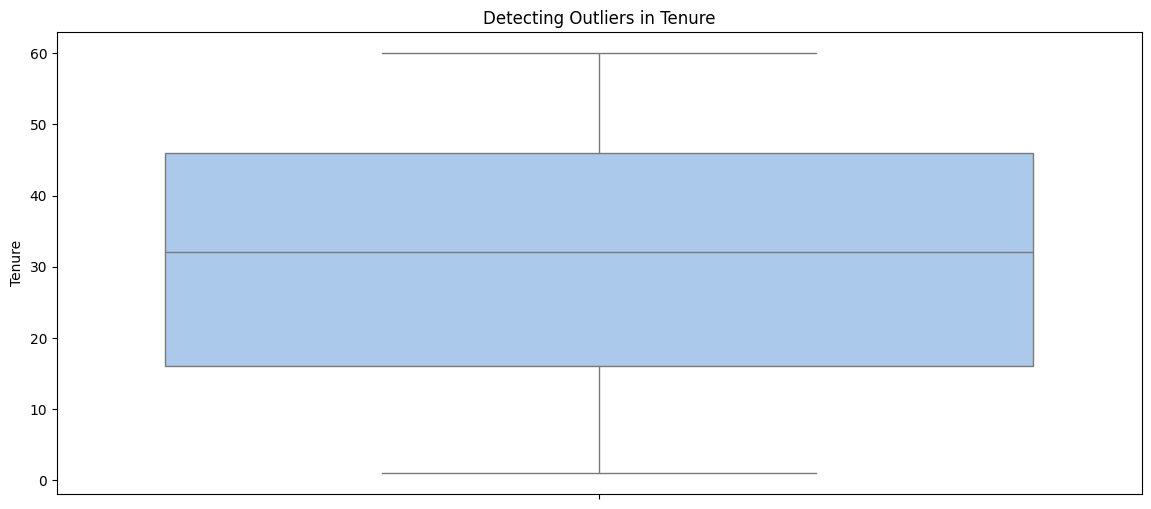

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


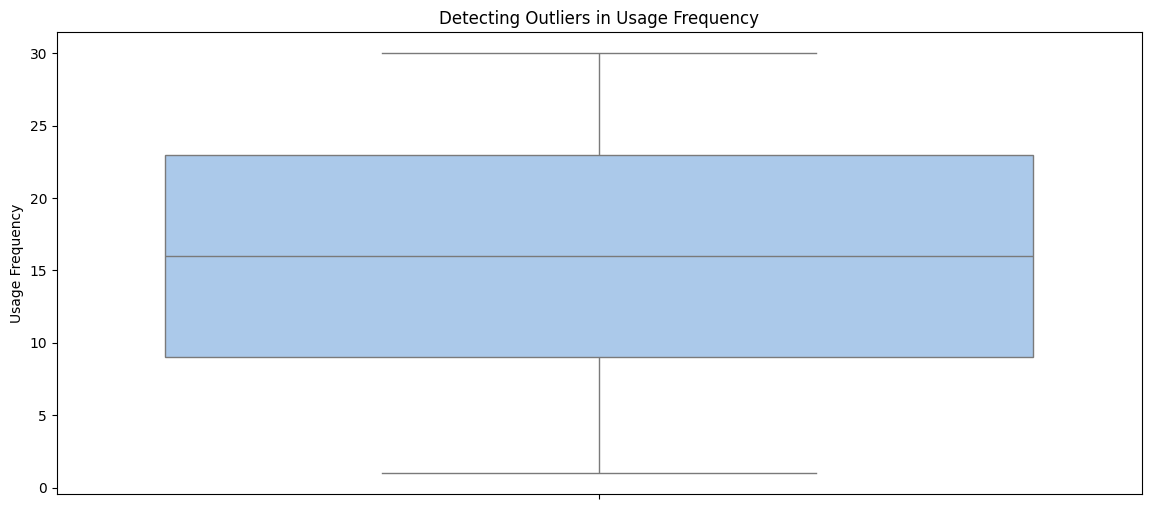

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


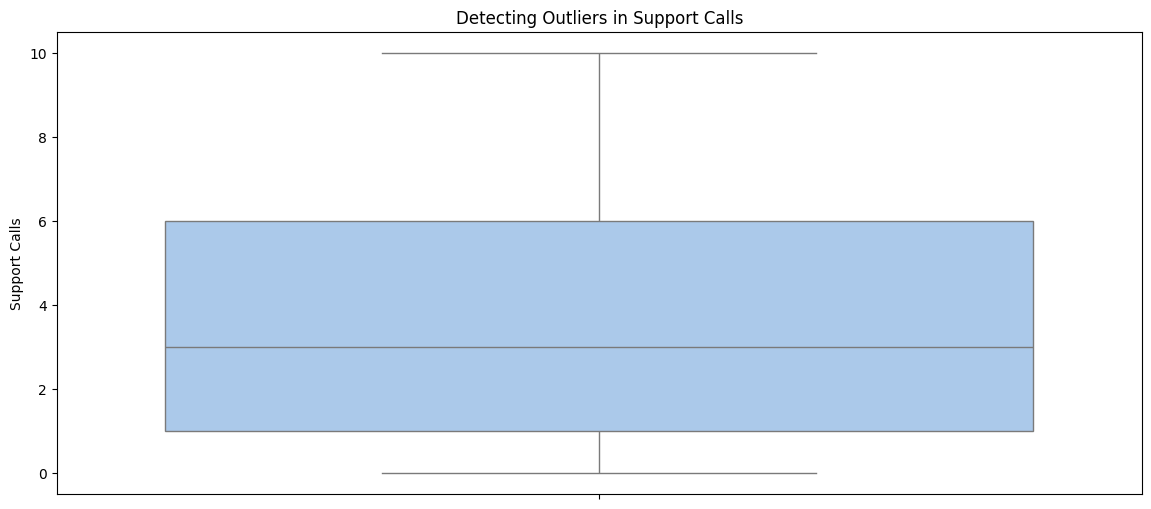

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


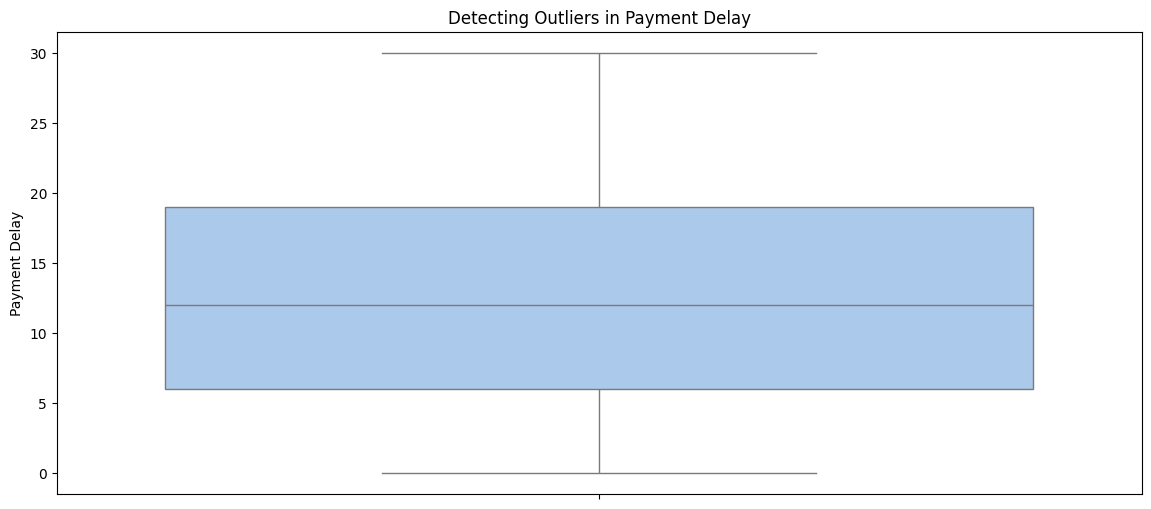

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


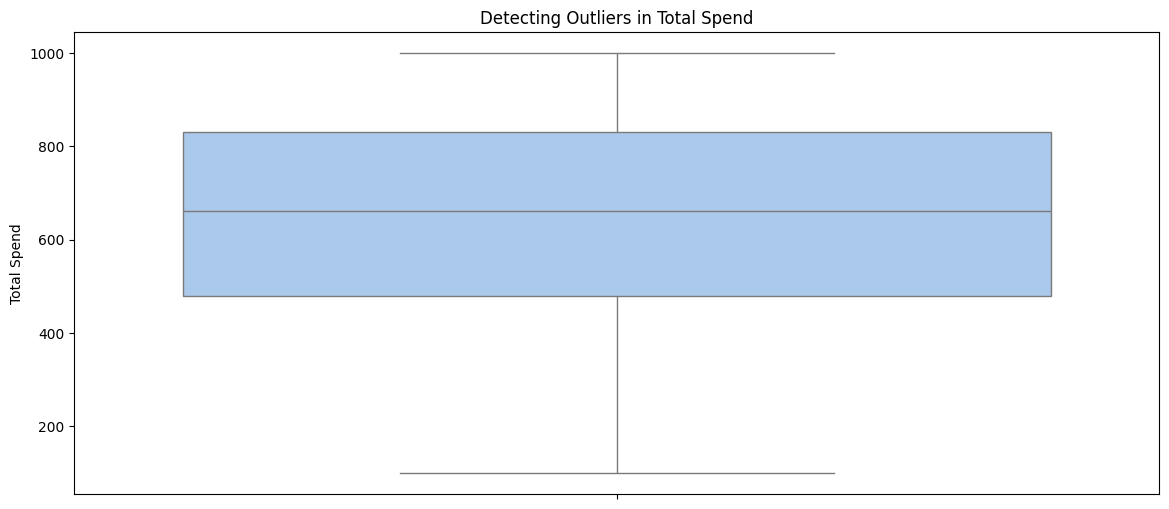

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


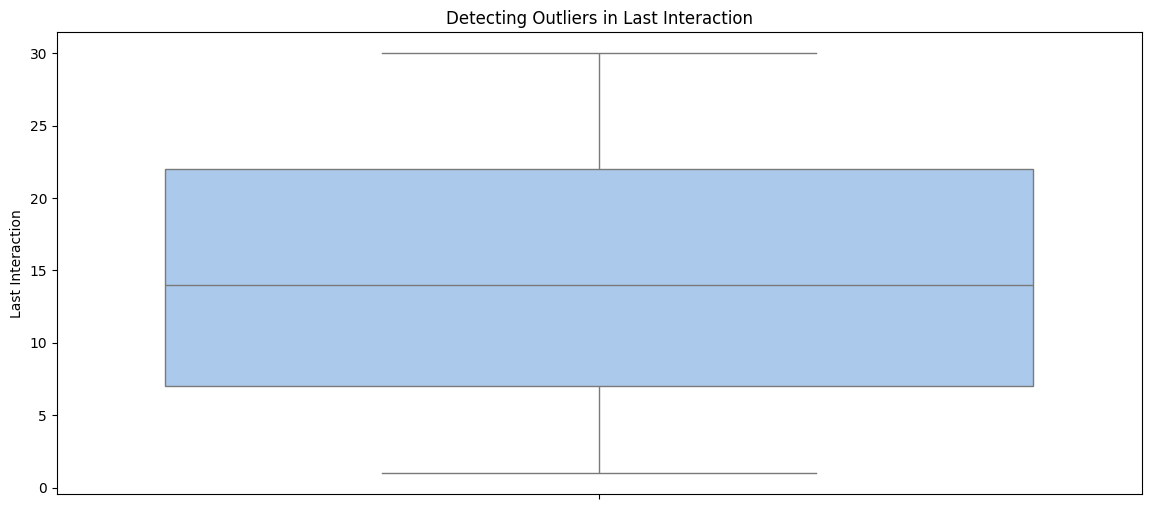

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\139997088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[i] , palette='pastel')


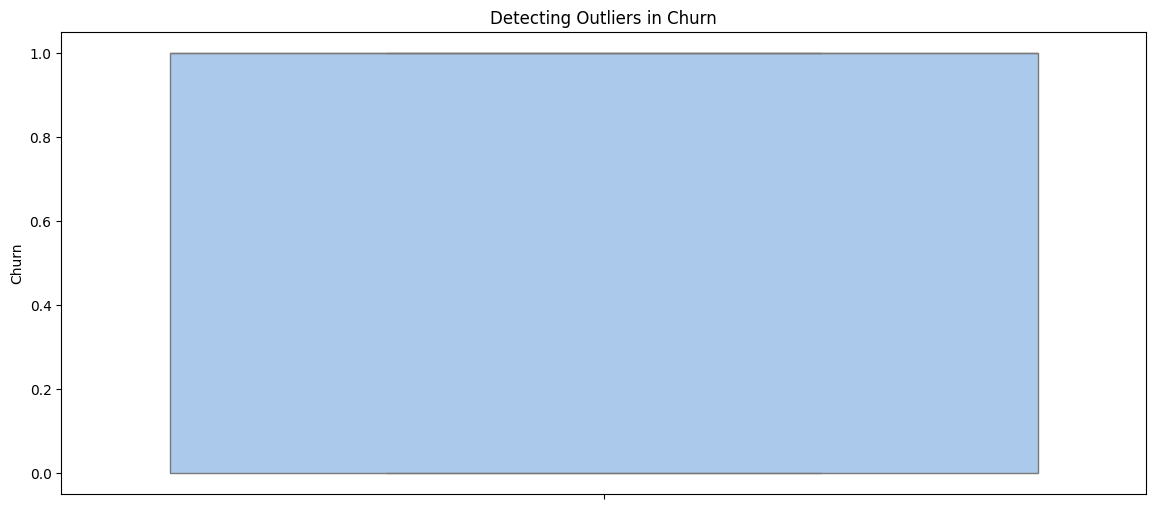

In [41]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
for i in num_cols:
    plt.figure(figsize=(14,6))
    sns.boxplot(df[i] , palette='pastel')
    plt.title(f"Detecting Outliers in {i}")
    plt.show()

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

# EDA (Exploratory Data Analysis)

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Univariate Analysis

In [42]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


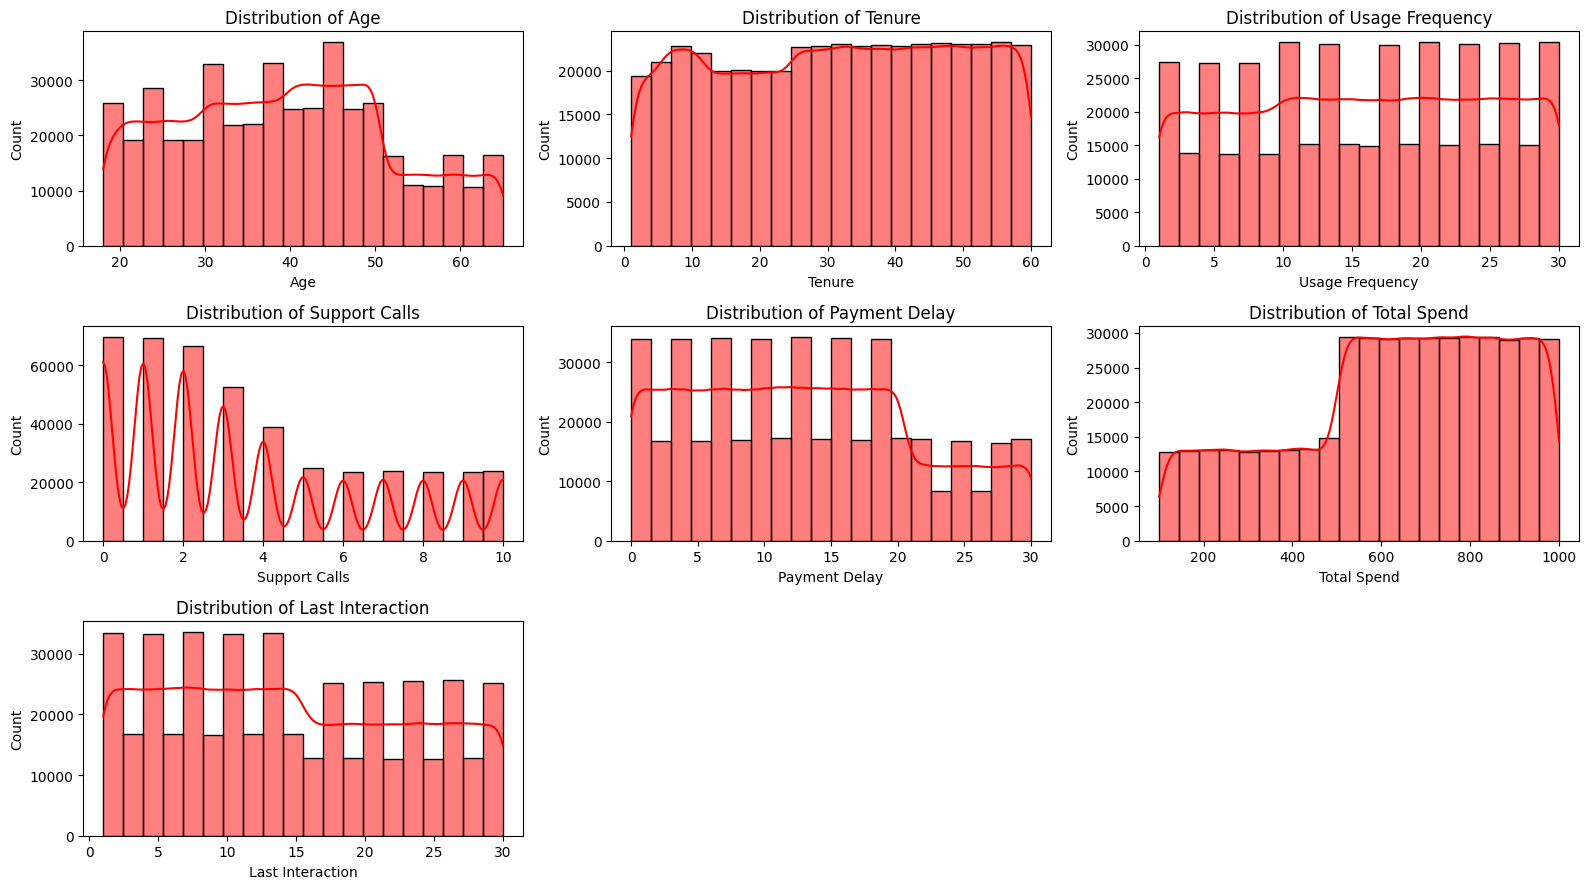

In [43]:
numerical = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']

fig, axes = plt.subplots(3, 3, figsize=(16, 9))

axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.histplot(df[col], kde=True, bins=20, color='red', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

### 🔍 Insights from Numerical Distributions: -
#### 1- Age:-
##### 📌 Distribution looks fairly spread out, with some clustering around the middle.
##### 📌 Real life impact: If younger or older customers dominate, product design, marketing, and risk assessment may need to be adjusted for those age groups.
------------------------------------------------------------------------
#### 2- Tenure (how long customers have been with the company): -
##### 📌 Appears somewhat uniform, suggesting customers are spread across different tenure levels.
##### 📌 Impact: High-tenure customers may be more loyal and less likely to churn, while newer customers may need more support/onboarding.
------------------------------------------------------------------------
#### 3- Usage Frequency
##### 📌 Distribution looks fairly even but with peaks in some ranges.
##### 📌 Impact: Customers with low usage may not see value and could churn. High usage indicates strong engagement — they may respond well to upselling.
------------------------------------------------------------------------
#### 4- Support Calls: -
##### 📌 Spiky distribution with clear peaks. Some customers call very frequently.
##### 📌 Impact: Many support calls often indicate dissatisfaction. Customers with unusually high support usage may be at high churn risk.
------------------------------------------------------------------------
#### 5- Payment Delay: -
##### 📌 Distribution shows several clusters. Some customers pay on time, others consistently delay.
##### 📌 Impact: Payment delays can signal financial struggles or dissatisfaction, which can lead to churn or higher credit risk.
------------------------------------------------------------------------
#### 6- Total Spend: -
##### 📌 Many customers clustered around middle-to-high spending levels.
##### 📌 Impact: High-spending customers are valuable and worth retaining. Low spenders may need incentives to increase activity.
------------------------------------------------------------------------
#### 7- Last Interaction: -
##### 📌 Distribution suggests varying levels of recency. Some customers interacted very recently, others a while ago.
##### 📌 Impact: Customers who haven’t interacted recently are at risk of churn. Tracking this helps in proactive retention campaigns.

In [44]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\1050063510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


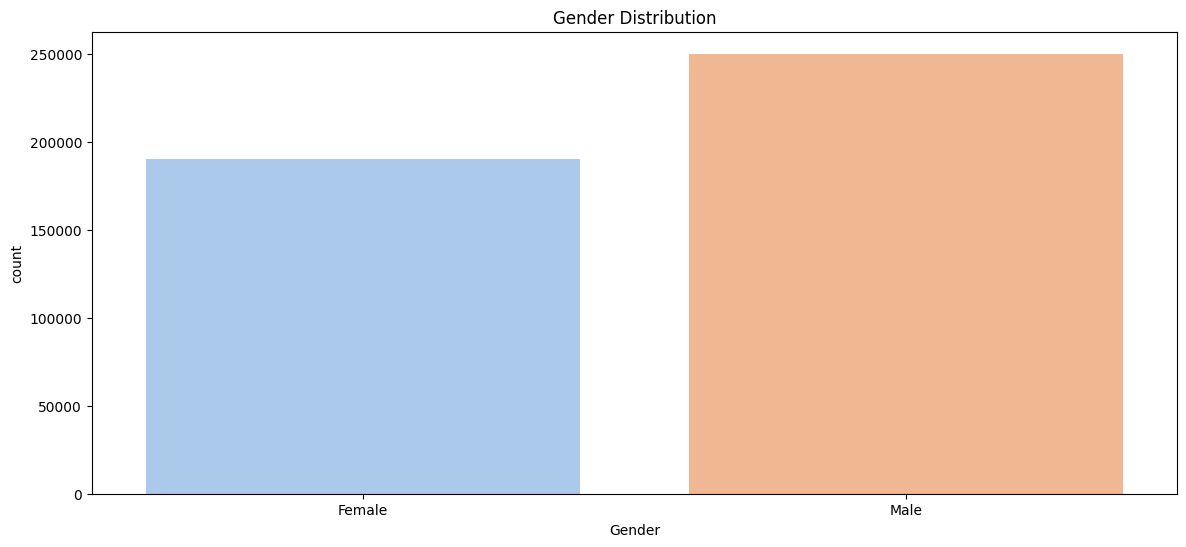

In [45]:
plt.figure(figsize=(14,6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\2749615798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Type', data=df, palette='pastel')


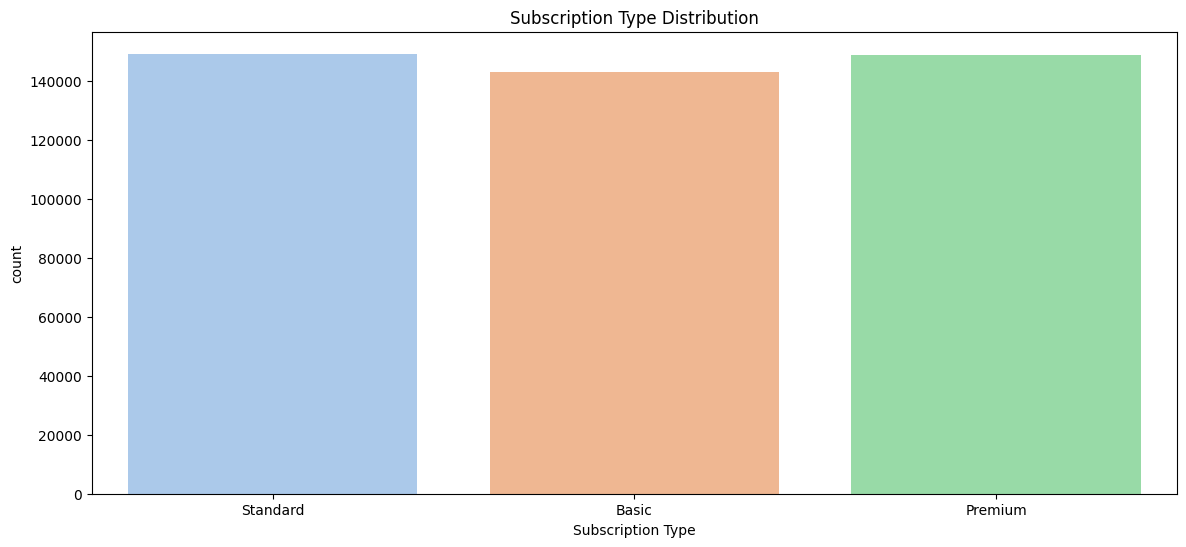

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [46]:
plt.figure(figsize=(14,6))
sns.countplot(x='Subscription Type', data=df, palette='pastel')
plt.title("Subscription Type Distribution")
plt.show()

df['Subscription Type'].value_counts()

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\4042662462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract Length', data=df, palette='pastel')


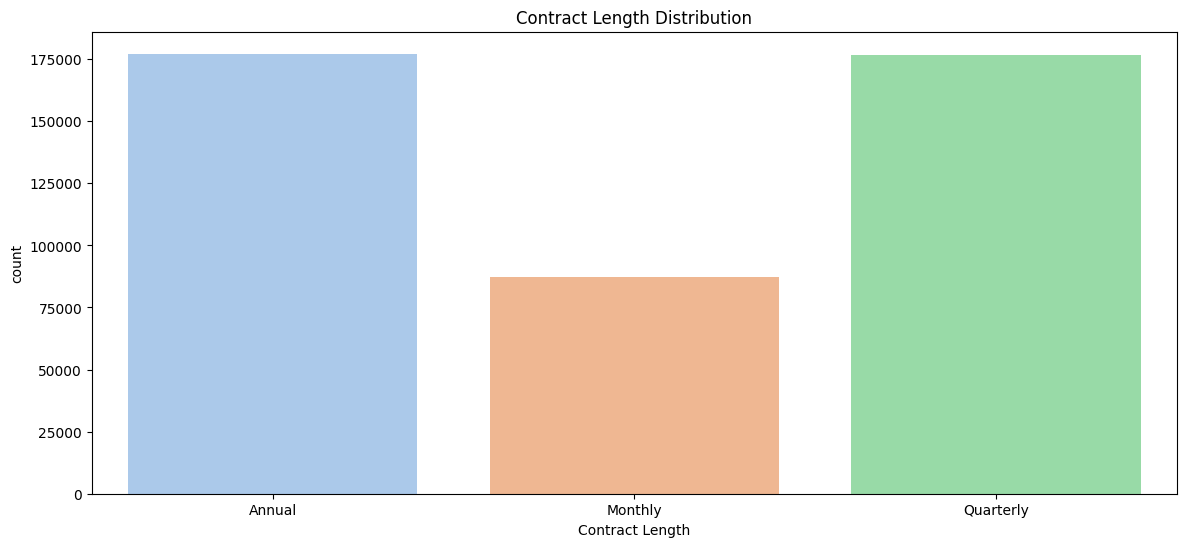

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [47]:
plt.figure(figsize=(14,6))
sns.countplot(x='Contract Length', data=df, palette='pastel')
plt.title("Contract Length Distribution")
plt.show()

df['Contract Length'].value_counts()

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\3085975259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


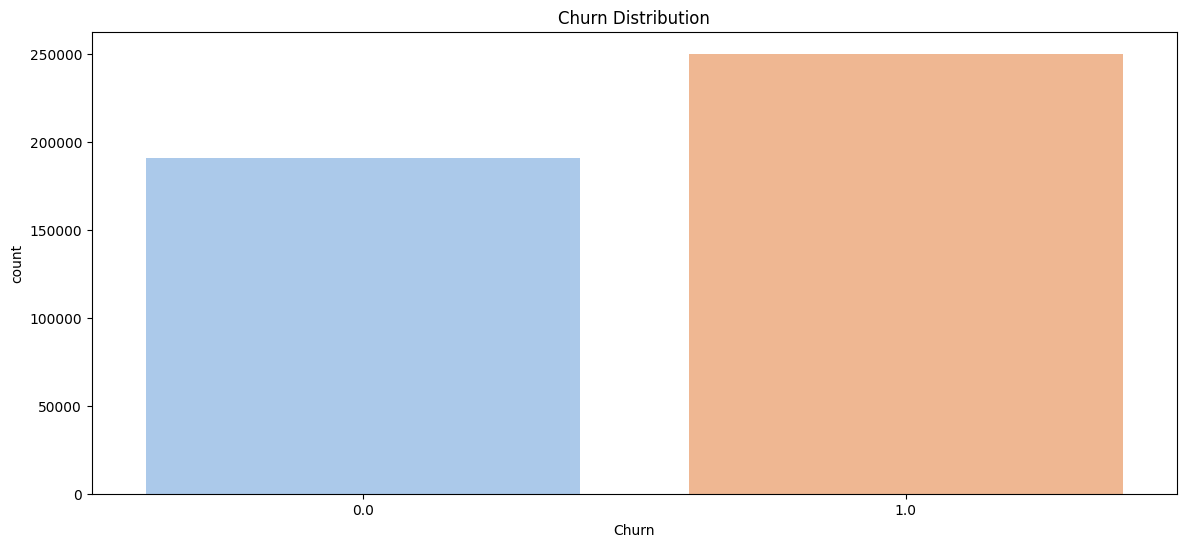

In [48]:
plt.figure(figsize=(14,6))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title("Churn Distribution")
plt.show()



<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Bivariate Analysis 

### Gender Churn

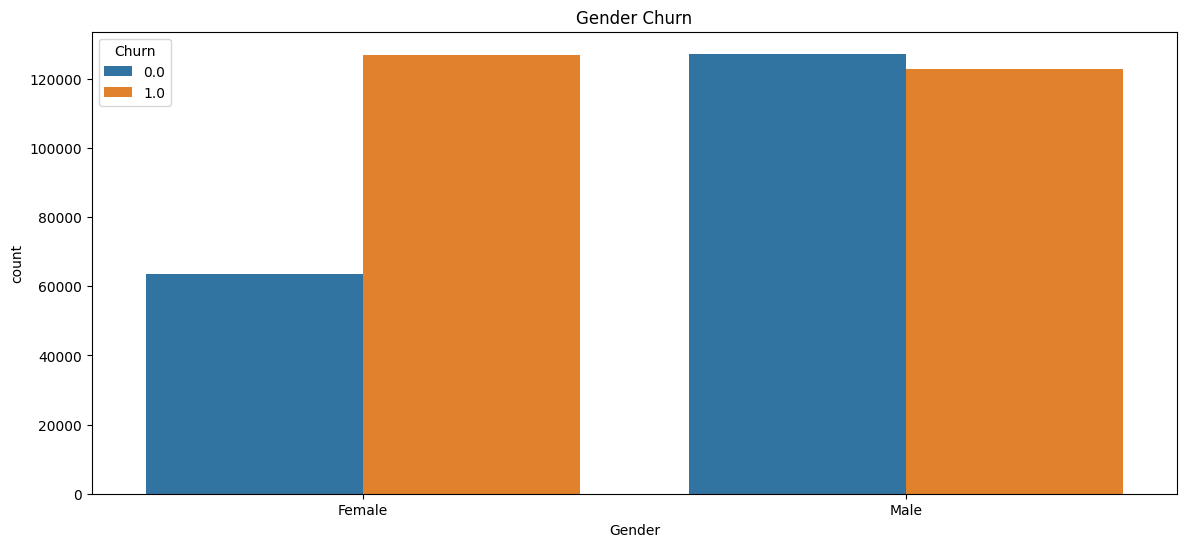

In [49]:
plt.figure(figsize=(14,6))
sns.countplot(x='Gender',hue='Churn' , data=df)
plt.title("Gender Churn")
plt.show()

### Subscription Type Churn

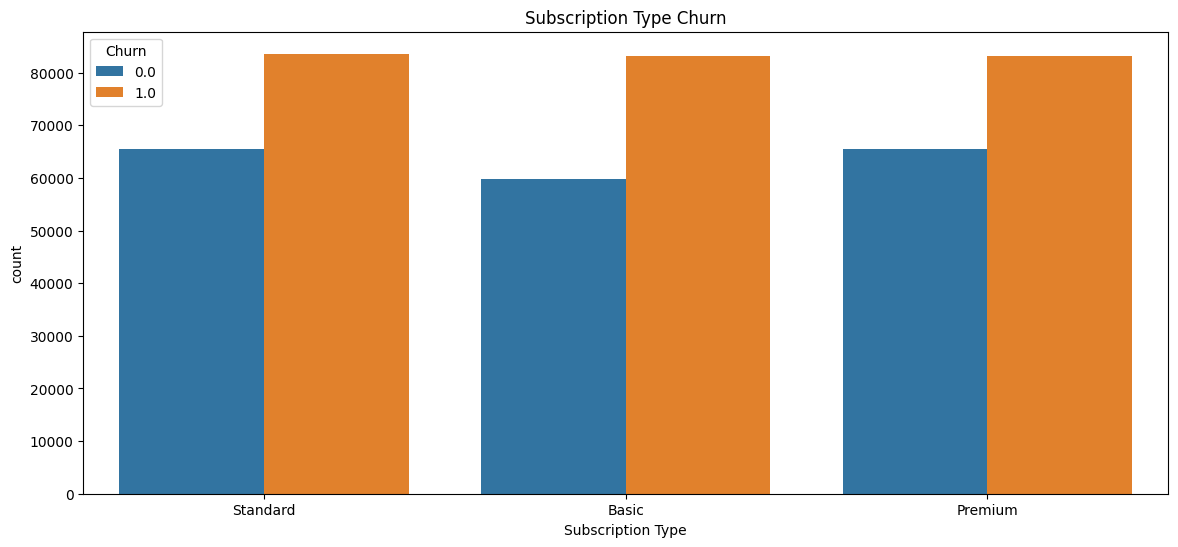

In [50]:
plt.figure(figsize=(14,6))
sns.countplot(x='Subscription Type',hue='Churn' , data=df)
plt.title("Subscription Type Churn")
plt.show()

### Contract Length Churn

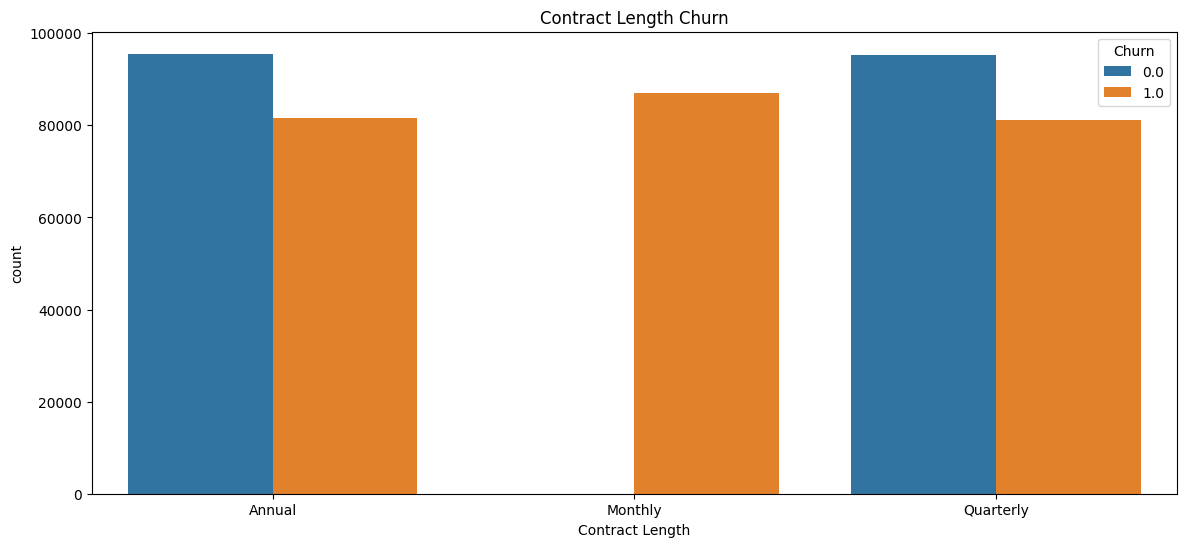

In [51]:
plt.figure(figsize=(14,6))
sns.countplot(x='Contract Length',hue='Churn' , data=df)
plt.title("Contract Length Churn")
plt.show()

C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\1385805990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, ax=axes[i], palette='pastel')
C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\1385805990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, ax=axes[i], palette='pastel')
C:\Users\Ahmed Hasaballa\AppData\Local\Temp\ipykernel_13844\1385805990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, ax=axes[i], palette='pastel')
C:\User

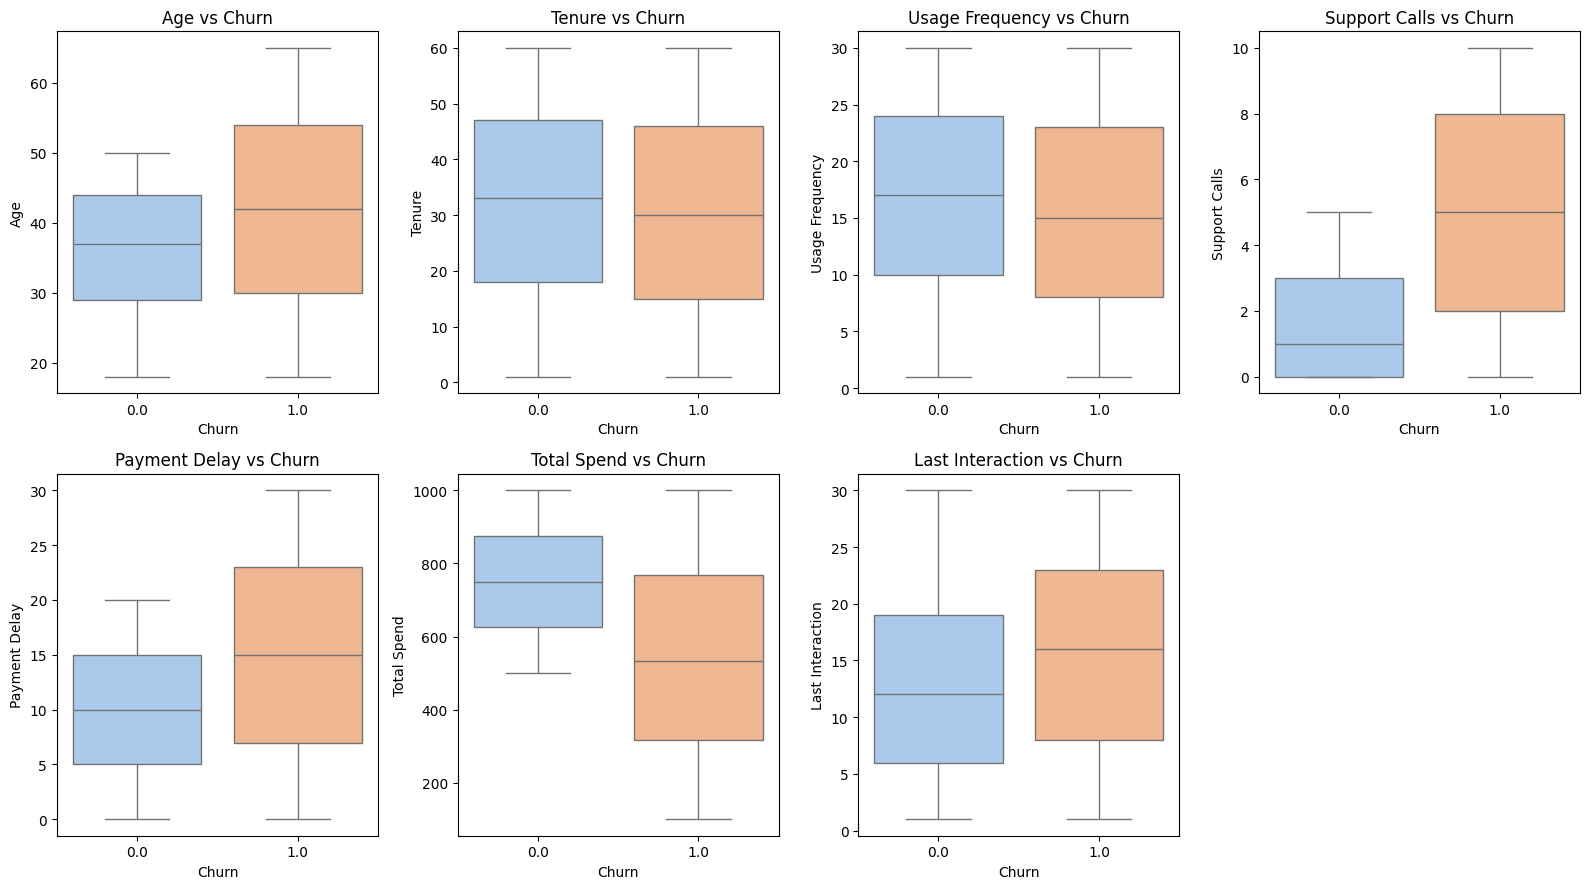

In [52]:
numerical = ['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']

fig, axes = plt.subplots(2, 4, figsize=(16, 9))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data=df, x="Churn", y=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f"{col} vs Churn")

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Scaling Numerical Features

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
print(numerical_cols)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,0.255319,Female,0.644068,0.448276,0.5,0.600000,Standard,Annual,0.924444,0.551724,1.0
1,1.000000,Female,0.813559,0.000000,1.0,0.266667,Basic,Monthly,0.507778,0.172414,1.0
2,0.787234,Female,0.220339,0.103448,0.6,0.600000,Basic,Quarterly,0.094444,0.068966,1.0
3,0.851064,Male,0.627119,0.689655,0.7,0.233333,Standard,Monthly,0.328889,0.965517,1.0
4,0.106383,Male,0.525424,0.655172,0.5,0.266667,Basic,Monthly,0.574444,0.655172,1.0


<div style="border:2px solid gray; padding:10px; border-radius:8px;">

### Applied Scaling using MinMaxScaler: -
#### 📌 Data is not quite distributed to apply standardization.
#### 📌 Features are scaled in a range from [0 , 1]

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Encoding Categorical Columns

In [54]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = lb.fit_transform(df[col])
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,0.255319,0,0.644068,0.448276,0.5,0.600000,2,0,0.924444,0.551724,1.0
1,1.000000,0,0.813559,0.000000,1.0,0.266667,0,1,0.507778,0.172414,1.0
2,0.787234,0,0.220339,0.103448,0.6,0.600000,0,2,0.094444,0.068966,1.0
3,0.851064,1,0.627119,0.689655,0.7,0.233333,2,1,0.328889,0.965517,1.0
4,0.106383,1,0.525424,0.655172,0.5,0.266667,0,1,0.574444,0.655172,1.0


<div style="border:2px solid gray; padding:10px; border-radius:8px;">

## Multivariate Analysis

<div style="border:2px solid gray; padding:10px; border-radius:8px;">

### Feature Correlation Heatmap

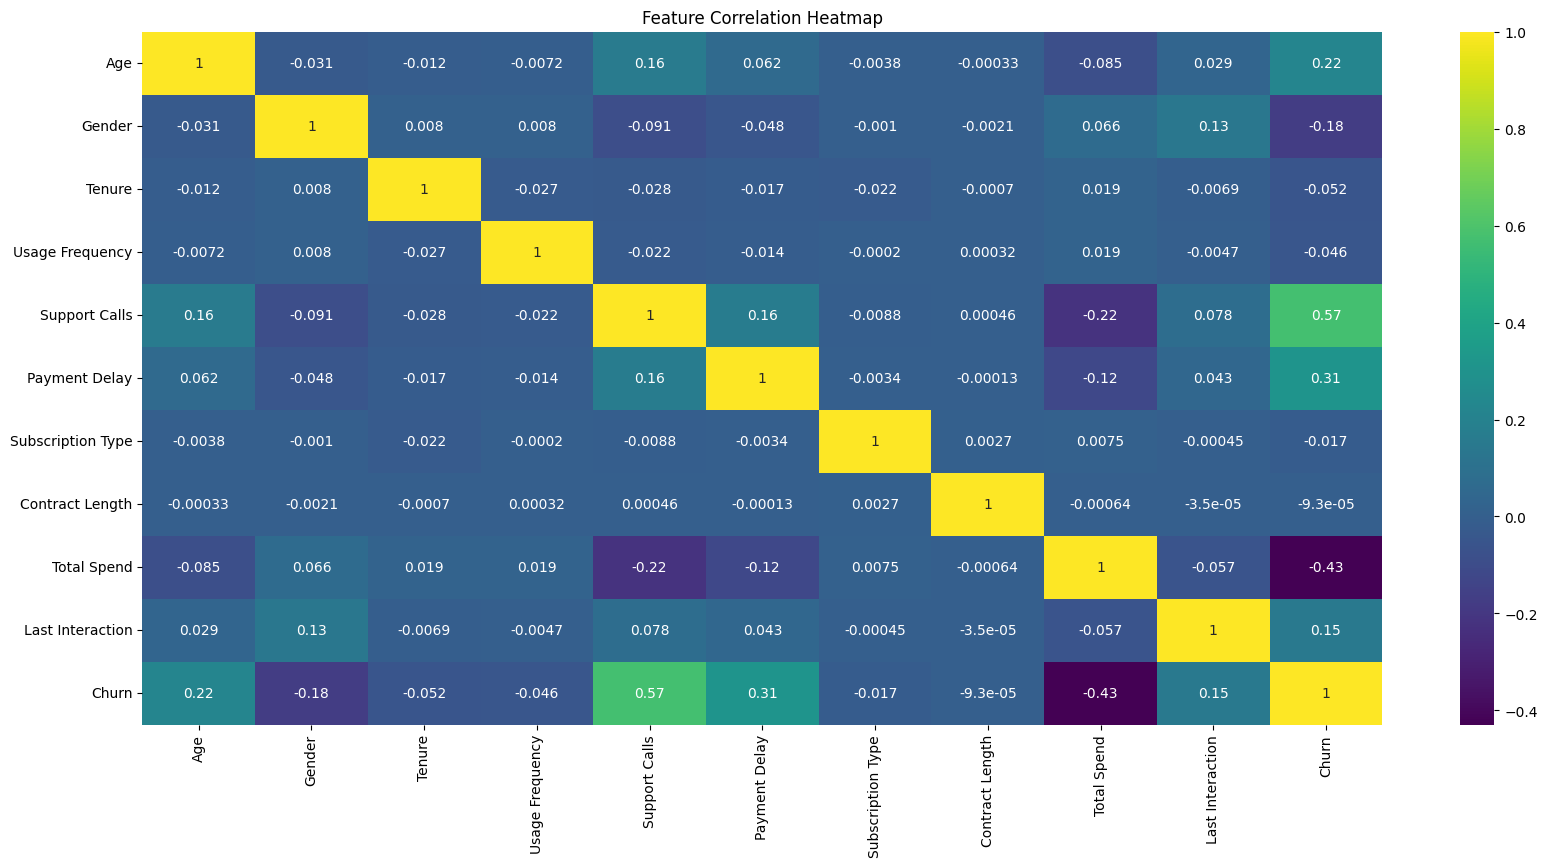

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(corr_matrix , annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()